In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import random
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from numpy.fft import fft

from matplotlib.ticker import ScalarFormatter
from IPython.display import display, Math, Latex

def dB(x):
    return 20*np.log10(x)

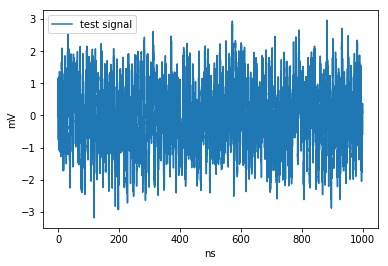

rms : 0.971 mV


In [2]:
t = np.arange(0,1000e-9,10e-12) 

noise = 10e-3 # 10 mV
noise_bw = 100e6 # 100 MHz noise


y = add_noise(t,t*0,rms=noise,bw=noise_bw)


# test sinus at 100 MHz, 1 mV pkpk
y += 1e-3 * np.sin(2*np.pi*100e6*t)

# test sinus at 1 GHz, 1 mV pkpk, half the amplitude of 100MHz
y += 0.5*1e-3 * np.sin(2*np.pi*1e9*t)


plt.plot(t*1e9,y*1e3,label="test signal")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()


print("rms : {:3.3f} mV".format(np.std(y)*1e3))

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(0.0010000200004000081, 10)

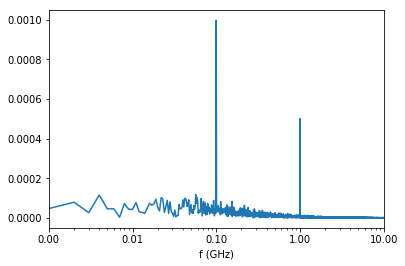

In [3]:
N = len(t)
T = t[1] -t[0]

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf/1e9, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel("f (GHz)")
plt.xscale("log")
plt.gca().axes.get_xaxis().set_major_formatter(ScalarFormatter())
plt.xlim(0,10)

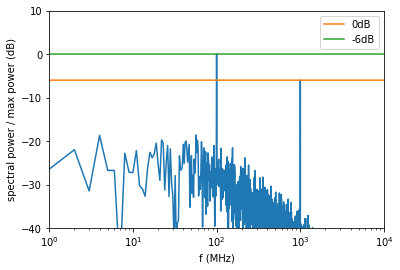

In [9]:
N = len(t)
T = t[1] -t[0]

yf = fft(y/1e-2)
yf = 2.0/N * np.abs(yf[0:N//2])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf/1e6, dB(yf/np.max(yf)) )
plt.plot(xf/1e6, xf*0-6,label="0dB" )
plt.plot(xf/1e6, xf*0 , label="-6dB")
plt.xlabel("f (MHz)")
plt.xscale("log")
plt.ylabel("spectral power / max power (dB)")
plt.ylim(-40,10)
plt.xlim(0,10000)
plt.legend()